In [1]:
import os
import sys
# add /home/shiftpub/Dynamic_AMM as a path
sys.path.append(os.path.join(os.getcwd(), '..'))
from env.amm import AMM
from env.oracle import OracleSimulator
from env.trader import Arbitrager

In [2]:
oracle = OracleSimulator(spread=1, sigma=1)
amm = AMM(fee_pool=True)
trader = Arbitrager(amm, oracle)

In [3]:
mkt_bids = []
mkt_asks = []
amm_bids = []
amm_asks = []
swap_infos = []


for _ in range(500):
    mkt_ask, mkt_bid = oracle.get_price()
    amm_ask, amm_bid = amm.get_price()
    mkt_bids.append(mkt_bid)
    mkt_asks.append(mkt_ask)
    amm_bids.append(amm_bid)
    amm_asks.append(amm_ask)
    
    swap_info = trader.swap()
    swap_infos.append(swap_info)
    oracle.next()
print(f"final_pnl: {trader.pnl}")
    

final_pnl: 793115.1241264973


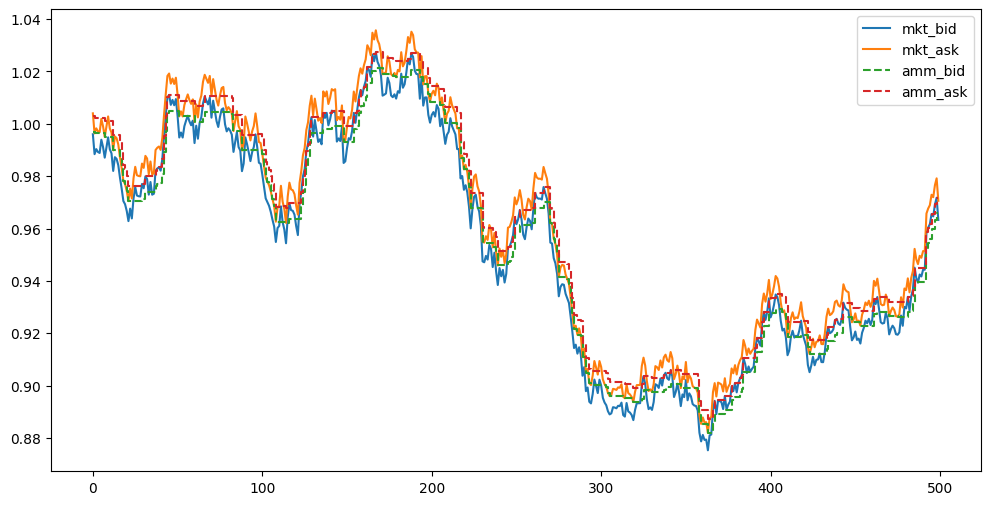

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(mkt_bids, label='mkt_bid')
plt.plot(mkt_asks, label='mkt_ask')
plt.step(range(len(amm_bids)), amm_bids, label='amm_bid', linestyle='--', where='pre')
plt.step(range(len(amm_asks)), amm_asks, label='amm_ask', linestyle='--', where='pre')
plt.legend()
plt.show()


In [5]:
from pprint import pprint
for idx, swap_info in enumerate(swap_infos):
    print(f'Round {idx}')
    pprint(swap_info)

Round 0
{'amm_ask': 1.0030090270812437,
 'amm_bid': 0.997,
 'amm_cost': 0,
 'fee': 0,
 'fee_cost': 0,
 'fee_pool': True,
 'fee_rate': 0.003,
 'lr': 1000000,
 'ls': 1000000,
 'mkt_ask': 1.0040080160320641,
 'mkt_bid': 0.9960079840319361,
 'mkt_gain': 0,
 'pnl': 0,
 'pre_lr': 1000000,
 'pre_ls': 1000000,
 'prev_amm_ask': 1.0030090270812437,
 'prev_amm_bid': 0.997,
 'spread': 1,
 'xr': 0,
 'xs': 0}
Round 1
{'amm_ask': 1.0023424046607075,
 'amm_bid': 0.9963373713143853,
 'amm_cost': 165829.94261325002,
 'fee': 0,
 'fee_cost': 0.0,
 'fee_pool': True,
 'fee_rate': 0.003,
 'lr': 1000332.9764794549,
 'ls': 999668.1326225024,
 'mkt_ask': 0.9963373713143854,
 'mkt_bid': 0.9884052912113017,
 'mkt_gain': 166384.3130227902,
 'pnl': 554.3704095401627,
 'pre_lr': 1000000,
 'pre_ls': 1000000,
 'prev_amm_ask': 1.0030090270812437,
 'prev_amm_bid': 0.997,
 'spread': 1,
 'xr': 331.97755001653263,
 'xs': -331.86737749760505}
Round 2
{'amm_ask': 1.0023424046607075,
 'amm_bid': 0.9963373713143853,
 'amm_cost

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/shiftpub/Dynamic_AMM/results/dummy_results/static_simulation_results_0.05_20241029_230923.csv')
print(df.columns)

Index(['fee_rate', 'sigma', 'total_pnl', 'total_fee', 'total_vol',
       'impermanent_loss', 'net_profit'],
      dtype='object')


In [8]:
# count how many impermanent loss is positive
sum(df['impermanent_loss'] > 0)

47